In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
survey = pd.read_csv('../Quarantine Survey - Edited.csv',sep=",", encoding='cp1252')
survey.head()

,ID,Start time,Completion time,Email,Name,How many hours a week do you currently work and/or attend class?,How many people do you currently live with?,How many hours a week do you currently spend on making or fixing things as a hobby?,Do you have pets? How many?,Do you feel like you decide how your day goes?,...,Do you work or attend class at least 60 hours a week?,Do you spend at least 5 hours a week studying outside of class?,Do you spend at least 5 hours a week socializing with your social inner circle?,"Conversion - Do you currently work from home? (Yes, No - 1, 0)",Do you get at least 2 hours of excercize each week?,Do you get at least 10 hours of excercize each week?,"Do you spend at least 5 hours a week socializing with people who aren't in your social inner circle, outside of work/class?","How much sleep do you get per night? (9+hours, 7+hours, 5+hours, less - 3, 2, 1, 0)",Do you spend time outside?,Do you spend time reading something you enjoy?
0,1,5/12/20 14:33:34,5/12/20 14:36:26,anonymous,NaN,40.0,1,4.0,3,6,...,0,0,0,1,0,0,0,1,1,1
1,2,5/12/20 14:34:43,5/12/20 14:37:32,anonymous,NaN,30.0,5,5.0,1,8,...,0,1,1,1,1,0,0,1,1,1
2,3,5/12/20 14:34:29,5/12/20 14:38:41,anonymous,NaN,40.0,2,0.0,0,9,...,0,1,0,1,1,0,0,1,1,1
3,4,5/12/20 14:41:40,5/12/20 14:44:30,anonymous,NaN,40.0,3,5.0,1,7,...,0,1,1,1,1,0,0,0,1,1
4,5,5/12/20 14:41:24,5/12/20 14:53:32,anonymous,NaN,35.0,1,30.0,2,6,...,0,1,1,1,1,0,0,1,0,1


In [3]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 46 columns):
 #   Column                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                        --------------  -----  
 0   ID                                                                                                                            116 non-null    int64  
 1   Start time                                                                                                                    116 non-null    object 
 2   Completion time                                                                                                               116 non-null    object 
 3   Email                                                                                                              

In [5]:
#Create a copy that removes the colums we won't be working with
survey_data_new = survey.drop(['ID', 'Start time', 'Completion time', 'Email', 'Name', '||INFERRED QUESTIONS||'], axis=1).copy()
survey_data_new.head()

,How many hours a week do you currently work and/or attend class?,How many people do you currently live with?,How many hours a week do you currently spend on making or fixing things as a hobby?,Do you have pets? How many?,Do you feel like you decide how your day goes?,How many hours a week do you currently spend studying outside of class?,How many hours a week do you currently spend socializing with your social inner circle?,Do you currently work from home?,How many hours a week do you currently spend exercising?,"At the end of the week, do you feel like you have more or less things on your To-do list?",...,Do you work or attend class at least 60 hours a week?,Do you spend at least 5 hours a week studying outside of class?,Do you spend at least 5 hours a week socializing with your social inner circle?,"Conversion - Do you currently work from home? (Yes, No - 1, 0)",Do you get at least 2 hours of excercize each week?,Do you get at least 10 hours of excercize each week?,"Do you spend at least 5 hours a week socializing with people who aren't in your social inner circle, outside of work/class?","How much sleep do you get per night? (9+hours, 7+hours, 5+hours, less - 3, 2, 1, 0)",Do you spend time outside?,Do you spend time reading something you enjoy?
0,40.0,1,4.0,3,6,2,1.0,Yes,1.0,Less,...,0,0,0,1,0,0,0,1,1,1
1,30.0,5,5.0,1,8,25,5.0,Yes,5.0,More,...,0,1,1,1,1,0,0,1,1,1
2,40.0,2,0.0,0,9,20,3.0,Yes,2.0,No Change,...,0,1,0,1,1,0,0,1,1,1
3,40.0,3,5.0,1,7,10,5.0,Yes,5.0,More,...,0,1,1,1,1,0,0,0,1,1
4,35.0,1,30.0,2,6,20,5.0,Yes,5.0,No Change,...,0,1,1,1,1,0,0,1,0,1


In [6]:
#Now we are going to recreate the AGE_BRACKETS column from the Income Analysis notebook, so we can join on it
age_brackets = pd.interval_range(start=15, freq=5, end=90, closed='left')

survey_data_new['AGE_BRACKET'] = pd.cut(survey_data_new['How old are you?'], bins=age_brackets)

survey_data_new['AGE_BRACKET'] = survey_data_new['AGE_BRACKET'].astype(str).str.replace('[','')
survey_data_new['AGE_BRACKET'] = survey_data_new['AGE_BRACKET'].astype(str).str.replace(')','')
survey_data_new['AGE_BRACKET'] = survey_data_new['AGE_BRACKET'].astype(str).str.replace(',',' -')
survey_data_new

,How many hours a week do you currently work and/or attend class?,How many people do you currently live with?,How many hours a week do you currently spend on making or fixing things as a hobby?,Do you have pets? How many?,Do you feel like you decide how your day goes?,How many hours a week do you currently spend studying outside of class?,How many hours a week do you currently spend socializing with your social inner circle?,Do you currently work from home?,How many hours a week do you currently spend exercising?,"At the end of the week, do you feel like you have more or less things on your To-do list?",...,Do you spend at least 5 hours a week studying outside of class?,Do you spend at least 5 hours a week socializing with your social inner circle?,"Conversion - Do you currently work from home? (Yes, No - 1, 0)",Do you get at least 2 hours of excercize each week?,Do you get at least 10 hours of excercize each week?,"Do you spend at least 5 hours a week socializing with people who aren't in your social inner circle, outside of work/class?","How much sleep do you get per night? (9+hours, 7+hours, 5+hours, less - 3, 2, 1, 0)",Do you spend time outside?,Do you spend time reading something you enjoy?,AGE_BRACKET
0,40.0,1,4.0,3,6,2,1.0,Yes,1.0,Less,...,0,0,1,0,0,0,1,1,1,30.0 - 35.0
1,30.0,5,5.0,1,8,25,5.0,Yes,5.0,More,...,1,1,1,1,0,0,1,1,1,30.0 - 35.0
2,40.0,2,0.0,0,9,20,3.0,Yes,2.0,No Change,...,1,0,1,1,0,0,1,1,1,25.0 - 30.0
3,40.0,3,5.0,1,7,10,5.0,Yes,5.0,More,...,1,1,1,1,0,0,0,1,1,35.0 - 40.0
4,35.0,1,30.0,2,6,20,5.0,Yes,5.0,No Change,...,1,1,1,1,0,0,1,0,1,40.0 - 45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,40.0,1,20.0,1,7,0,10.0,Yes,3.0,No Change,...,0,1,1,1,0,0,1,1,1,30.0 - 35.0
112,25.0,1,0.0,1,6,0,0.0,Yes,1.0,More,...,0,0,1,0,0,0,1,1,0,40.0 - 45.0
113,53.0,0,0.0,1,3,2,4.0,Yes,0.0,More,...,0,0,1,0,0,0,0,1,1,30.0 - 35.0
114,25.0,1,5.0,2,5,25,2.0,No,5.0,Less,...,1,0,0,1,0,0,2,1,1,35.0 - 40.0


In [7]:
income_by_age_bracket = pd.read_csv('../income_by_age_bracket.csv')
#income_by_age_bracket = income_by_age_bracket['AGE_BRACKET', 'PTOTVAL']
income_by_age_bracket = income_by_age_bracket.drop('Unnamed: 0', axis=1)
income_by_age_bracket

,AGE_BRACKET,PTOTVAL
0,15.0 - 20.0,0.0
1,20.0 - 25.0,15250.0
2,25.0 - 30.0,35020.0
3,30.0 - 35.0,38000.0
4,35.0 - 40.0,50259.0
5,40.0 - 45.0,47510.5
6,45.0 - 50.0,40000.0
7,50.0 - 55.0,35800.0
8,55.0 - 60.0,52835.0
9,60.0 - 65.0,36989.5


In [8]:
#Now we merge our total income value on the Age Bracket column we made
survey_data_new = pd.merge(survey_data_new, income_by_age_bracket, on='AGE_BRACKET', how='left')
survey_data_new

,How many hours a week do you currently work and/or attend class?,How many people do you currently live with?,How many hours a week do you currently spend on making or fixing things as a hobby?,Do you have pets? How many?,Do you feel like you decide how your day goes?,How many hours a week do you currently spend studying outside of class?,How many hours a week do you currently spend socializing with your social inner circle?,Do you currently work from home?,How many hours a week do you currently spend exercising?,"At the end of the week, do you feel like you have more or less things on your To-do list?",...,Do you spend at least 5 hours a week socializing with your social inner circle?,"Conversion - Do you currently work from home? (Yes, No - 1, 0)",Do you get at least 2 hours of excercize each week?,Do you get at least 10 hours of excercize each week?,"Do you spend at least 5 hours a week socializing with people who aren't in your social inner circle, outside of work/class?","How much sleep do you get per night? (9+hours, 7+hours, 5+hours, less - 3, 2, 1, 0)",Do you spend time outside?,Do you spend time reading something you enjoy?,AGE_BRACKET,PTOTVAL
0,40.0,1,4.0,3,6,2,1.0,Yes,1.0,Less,...,0,1,0,0,0,1,1,1,30.0 - 35.0,38000.0
1,30.0,5,5.0,1,8,25,5.0,Yes,5.0,More,...,1,1,1,0,0,1,1,1,30.0 - 35.0,38000.0
2,40.0,2,0.0,0,9,20,3.0,Yes,2.0,No Change,...,0,1,1,0,0,1,1,1,25.0 - 30.0,35020.0
3,40.0,3,5.0,1,7,10,5.0,Yes,5.0,More,...,1,1,1,0,0,0,1,1,35.0 - 40.0,50259.0
4,35.0,1,30.0,2,6,20,5.0,Yes,5.0,No Change,...,1,1,1,0,0,1,0,1,40.0 - 45.0,47510.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,40.0,1,20.0,1,7,0,10.0,Yes,3.0,No Change,...,1,1,1,0,0,1,1,1,30.0 - 35.0,38000.0
112,25.0,1,0.0,1,6,0,0.0,Yes,1.0,More,...,0,1,0,0,0,1,1,0,40.0 - 45.0,47510.5
113,53.0,0,0.0,1,3,2,4.0,Yes,0.0,More,...,0,1,0,0,0,0,1,1,30.0 - 35.0,38000.0
114,25.0,1,5.0,2,5,25,2.0,No,5.0,Less,...,0,0,1,0,0,2,1,1,35.0 - 40.0,50259.0


In [18]:
survey_data_new['PTOTVAL']

0      38000.0
1      38000.0
2      35020.0
3      50259.0
4      47510.5
        ...   
111    38000.0
112    47510.5
113    38000.0
114    50259.0
115    50259.0
Name: PTOTVAL, Length: 116, dtype: float64

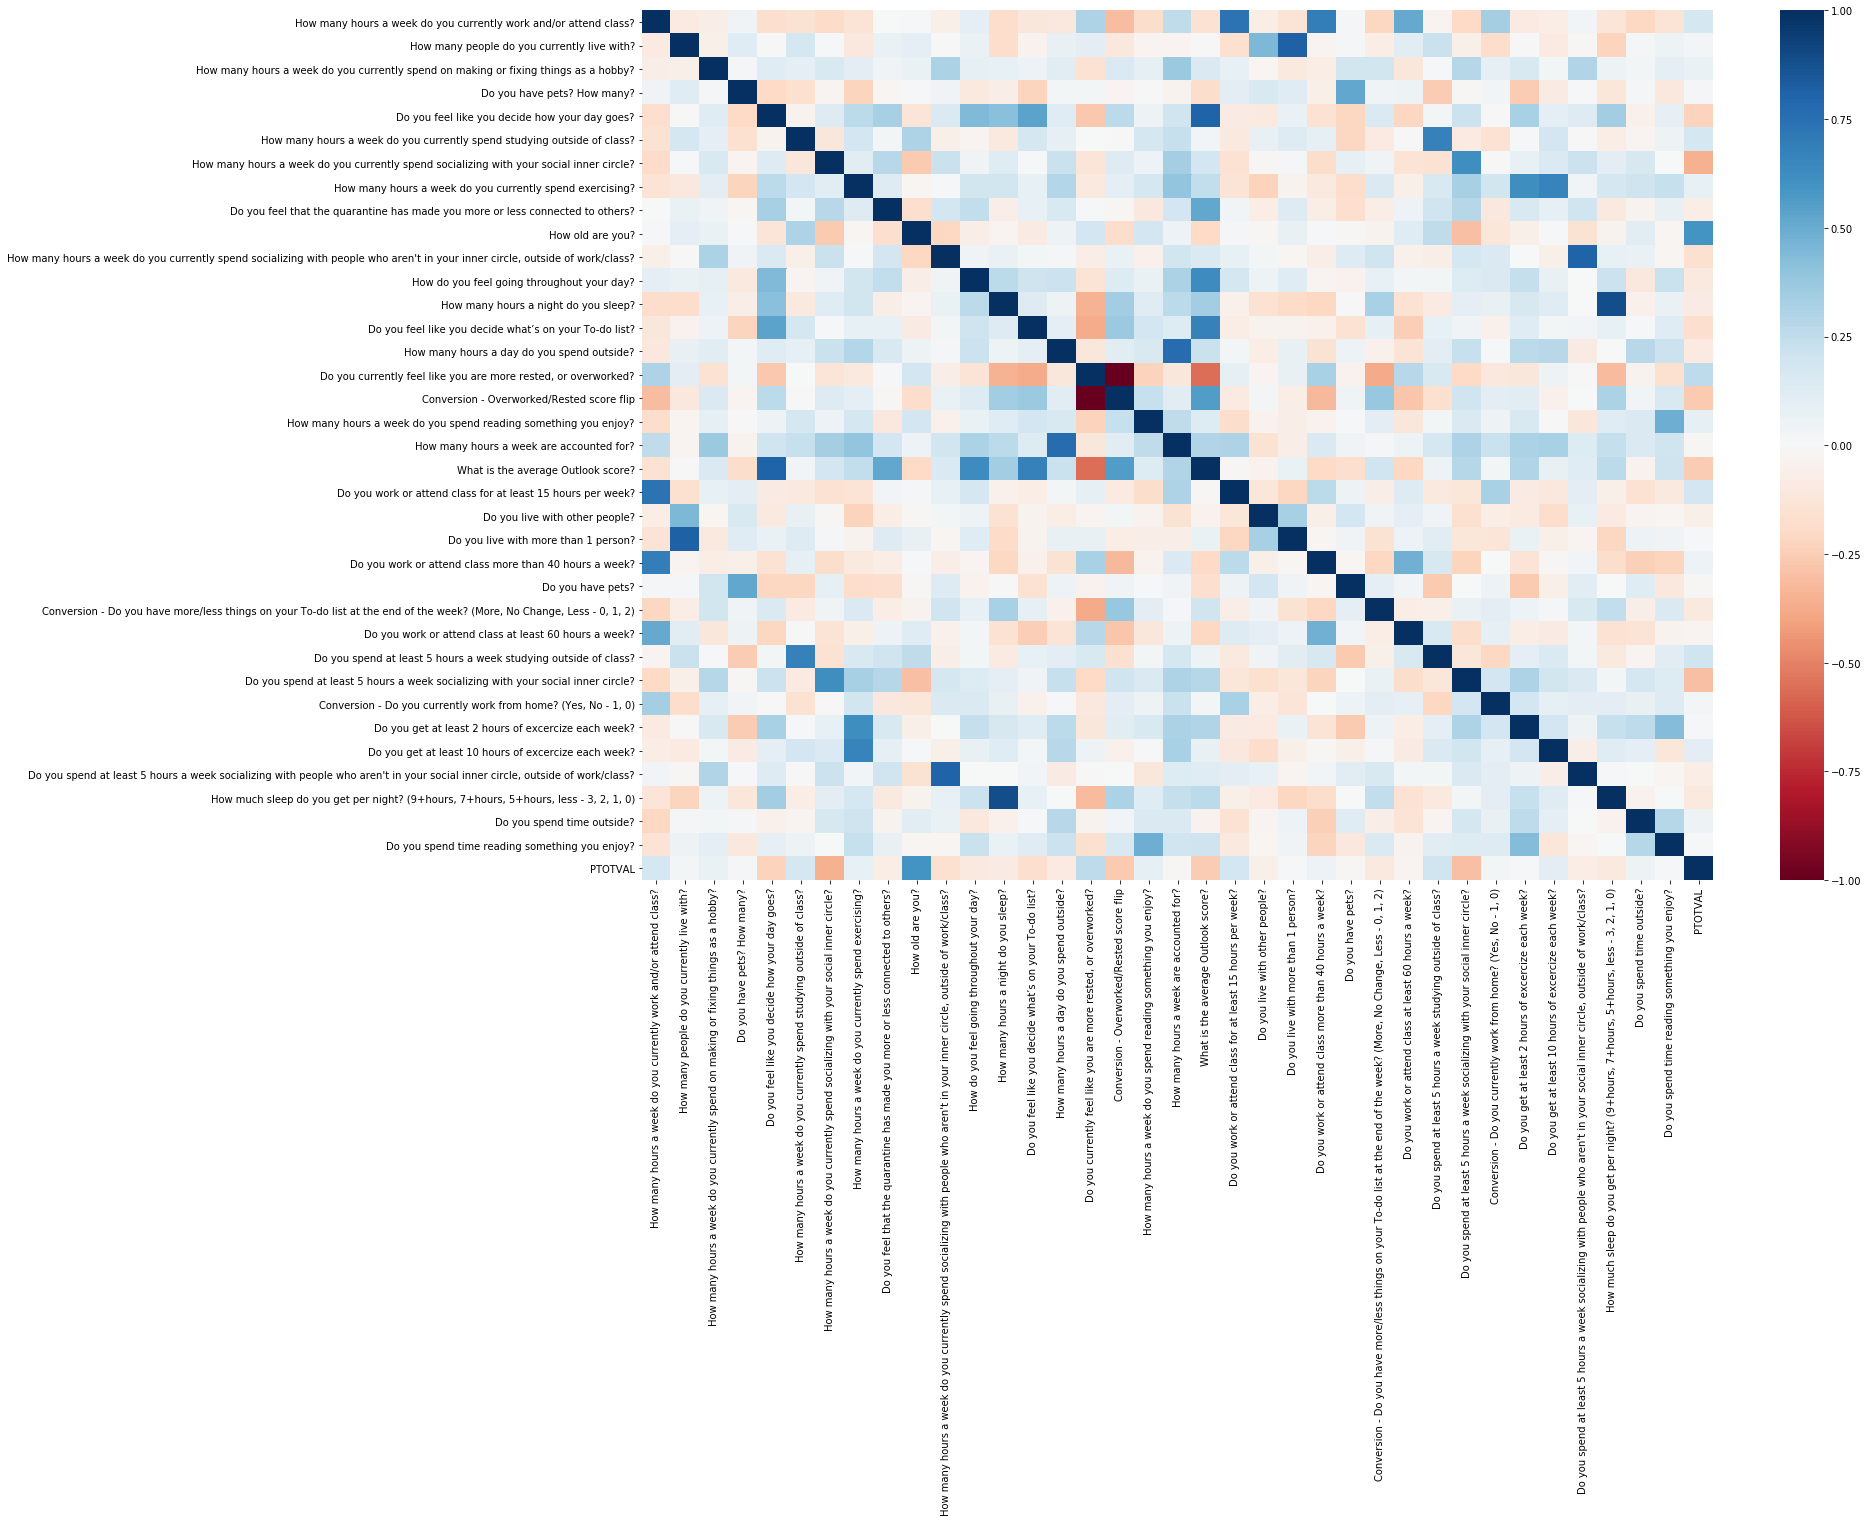

In [19]:
#Let's plot a correlation matrix and see where our strong correlations lie
plt.figure(figsize=(24, 16))
_ = sns.heatmap(survey_data_new.corr(), vmin = -1, vmax = 1, center = 0, cmap = "RdBu", annot = False)
_ = plt.show()

In [11]:
survey_data_new.corr()

,How many hours a week do you currently work and/or attend class?,How many people do you currently live with?,How many hours a week do you currently spend on making or fixing things as a hobby?,Do you have pets? How many?,Do you feel like you decide how your day goes?,How many hours a week do you currently spend studying outside of class?,How many hours a week do you currently spend socializing with your social inner circle?,How many hours a week do you currently spend exercising?,Do you feel that the quarantine has made you more or less connected to others?,How old are you?,...,Do you spend at least 5 hours a week studying outside of class?,Do you spend at least 5 hours a week socializing with your social inner circle?,"Conversion - Do you currently work from home? (Yes, No - 1, 0)",Do you get at least 2 hours of excercize each week?,Do you get at least 10 hours of excercize each week?,"Do you spend at least 5 hours a week socializing with people who aren't in your social inner circle, outside of work/class?","How much sleep do you get per night? (9+hours, 7+hours, 5+hours, less - 3, 2, 1, 0)",Do you spend time outside?,Do you spend time reading something you enjoy?,PTOTVAL
How many hours a week do you currently work and/or attend class?,1.000000,-0.091952,-0.062757,0.042689,-0.170463,-0.142204,-0.187852,-0.139160,0.007668,0.008656,...,-0.029184,-0.198769,0.341744,-0.091950,-0.071870,0.038048,-0.127684,-0.206560,-0.134186,0.172798
How many people do you currently live with?,-0.091952,1.000000,-0.057961,0.117467,-0.007482,0.178068,0.009565,-0.103172,0.062901,0.096513,...,0.222460,-0.057228,-0.182756,-0.007541,-0.087880,-0.011649,-0.223632,0.016495,0.052330,0.028276
How many hours a week do you currently spend on making or fixing things as a hobby?,-0.062757,-0.057961,1.000000,0.023115,0.123639,0.096634,0.160216,0.109105,0.041282,0.070116,...,0.013619,0.286557,0.089414,0.159639,0.023858,0.300598,0.054575,0.029136,0.094271,0.070231
Do you have pets? How many?,0.042689,0.117467,0.023115,1.000000,-0.196282,-0.157071,-0.027868,-0.225143,-0.022670,0.012604,...,-0.253896,-0.010894,0.033771,-0.257018,-0.083733,0.014680,-0.119252,0.022616,-0.109187,0.023026
Do you feel like you decide how your day goes?,-0.170463,-0.007482,0.123639,-0.196282,1.000000,-0.038982,0.126420,0.271288,0.331324,-0.132122,...,0.023492,0.215932,-0.003978,0.322749,0.099781,0.128655,0.343871,-0.054357,0.088736,-0.226891
How many hours a week do you currently spend studying outside of class?,-0.142204,0.178068,0.096634,-0.157071,-0.038982,1.000000,-0.114077,0.186662,0.023977,0.306855,...,0.674656,-0.086856,-0.149099,0.012833,0.183062,-0.002229,-0.070632,-0.024097,0.050878,0.177039
How many hours a week do you currently spend socializing with your social inner circle?,-0.187852,0.009565,0.160216,-0.027868,0.126420,-0.114077,1.000000,0.113081,0.276097,-0.260380,...,-0.154646,0.619360,-0.006786,0.084338,0.150205,0.211567,0.104909,0.170026,0.002027,-0.359068
How many hours a week do you currently spend exercising?,-0.139160,-0.103172,0.109105,-0.225143,0.271288,0.186662,0.113081,1.000000,0.129698,-0.019808,...,0.158483,0.331681,0.188044,0.620448,0.667380,0.033844,0.177265,0.205132,0.229130,0.081832
Do you feel that the quarantine has made you more or less connected to others?,0.007668,0.062901,0.041282,-0.022670,0.331324,0.023977,0.276097,0.129698,1.000000,-0.165787,...,0.195509,0.288192,-0.109020,0.162958,0.090369,0.198027,-0.097604,-0.035757,0.074203,-0.073184
How old are you?,0.008656,0.096513,0.070116,0.012604,-0.132122,0.306855,-0.260380,-0.019808,-0.165787,1.000000,...,0.250323,-0.298825,-0.117230,-0.059089,0.010168,-0.141414,-0.036042,0.111123,-0.023224,0.594999


In [23]:
for x in survey_data_new.columns:
    print("\n", x)
    for y in survey_data_new.columns:
        if x != y:
            try:
                corr = survey_data_new[x].corr(survey_data_new[y])
                if abs(corr)>0.5:
                    print("\t*",y, round(corr, 3))
            except:
                pass
    


 How many hours a week do you currently work and/or attend class?
	* Do you work or attend class for at least 15 hours per week? 0.737
	* Do you work or attend class more than 40 hours a week? 0.692
	* Do you work or attend class at least 60 hours a week? 0.509

 How many people do you currently live with?
	* Do you live with more than 1 person? 0.813

 How many hours a week do you currently spend on making or fixing things as a hobby?

 Do you have pets? How many?
	* Do you have pets? 0.52

 Do you feel like you decide how your day goes?
	* Do you feel like you decide what’s on your To-do list? 0.533
	* What is the average Outlook score? 0.805

 How many hours a week do you currently spend studying outside of class?
	* Do you spend at least 5 hours a week studying outside of class? 0.675

 How many hours a week do you currently spend socializing with your social inner circle?
	* Do you spend at least 5 hours a week socializing with your social inner circle? 0.619

 Do you currently w

Reading through the above, the only value that seems to have a moderate or higher correlation is 'PTOTVAL' (total income) and 'How old are you?'. This redirects us from our original data question into a deeper dive into the data. 

In [45]:
outlooks = survey_data_new[['Do you feel like you decide how your day goes?',
                            'Do you feel that the quarantine has made you more or less connected to others?',
                            'How do you feel going throughout your day?',
                            'Do you feel like you decide what’s on your To-do list?',
                            'Conversion - Overworked/Rested score flip']]

averages = outlooks.mean()
averages

Do you feel like you decide how your day goes?                                    6.681034
Do you feel that the quarantine has made you more or less connected to others?    4.318966
How do you feel going throughout your day?                                        5.077586
Do you feel like you decide what’s on your To-do list?                            6.456897
Conversion - Overworked/Rested score flip                                         4.620690
dtype: float64

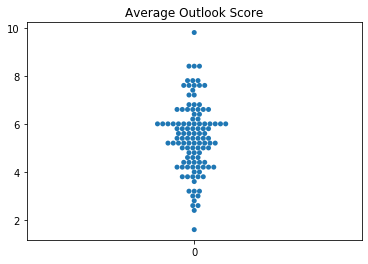

In [54]:
#Let's take a look at where our Outlook scores fall
_ = sns.swarmplot(data = survey_data_new['What is the average Outlook score?'])
_ = plt.title('Average Outlook Score')
plt.show()

In [63]:
survey_data_new = survey_data_new.sort_values('What is the average Outlook score?', ascending=False)
survey_data_new['What is the average Outlook score?'].head()

71     9.8
100    8.4
81     8.4
24     8.4
2      7.8
Name: What is the average Outlook score?, dtype: float64

In [65]:
high_outlook = survey_data_new.head(15)
high_outlook

,How many hours a week do you currently work and/or attend class?,How many people do you currently live with?,How many hours a week do you currently spend on making or fixing things as a hobby?,Do you have pets? How many?,Do you feel like you decide how your day goes?,How many hours a week do you currently spend studying outside of class?,How many hours a week do you currently spend socializing with your social inner circle?,Do you currently work from home?,How many hours a week do you currently spend exercising?,"At the end of the week, do you feel like you have more or less things on your To-do list?",...,Do you spend at least 5 hours a week socializing with your social inner circle?,"Conversion - Do you currently work from home? (Yes, No - 1, 0)",Do you get at least 2 hours of excercize each week?,Do you get at least 10 hours of excercize each week?,"Do you spend at least 5 hours a week socializing with people who aren't in your social inner circle, outside of work/class?","How much sleep do you get per night? (9+hours, 7+hours, 5+hours, less - 3, 2, 1, 0)",Do you spend time outside?,Do you spend time reading something you enjoy?,AGE_BRACKET,PTOTVAL
71,40.0,4,1.0,2,10,10,20.0,Yes,10.0,More,...,1,1,1,1,0,1,1,1,30.0 - 35.0,38000.0
100,50.0,3,20.0,1,10,20,5.0,Yes,7.0,More,...,1,1,1,0,1,0,1,1,25.0 - 30.0,35020.0
81,45.0,0,7.0,1,10,1,10.0,Yes,7.0,No Change,...,1,1,1,0,0,1,1,1,25.0 - 30.0,35020.0
24,6.0,3,0.0,0,9,5,9.0,No,2.0,No Change,...,1,0,1,0,0,0,1,1,15.0 - 20.0,0.0
2,40.0,2,0.0,0,9,20,3.0,Yes,2.0,No Change,...,0,1,1,0,0,1,1,1,25.0 - 30.0,35020.0
90,40.0,1,8.0,0,10,0,5.0,Yes,5.0,More,...,1,1,1,0,0,1,1,1,25.0 - 30.0,35020.0
42,15.0,2,0.0,0,10,20,1.0,No,0.0,No Change,...,0,0,0,0,0,1,0,0,50.0 - 55.0,35800.0
6,35.0,0,2.0,0,9,6,8.0,No,8.0,More,...,1,0,1,0,0,1,1,1,25.0 - 30.0,35020.0
17,40.0,1,0.0,0,8,20,0.0,Yes,2.0,No Change,...,0,1,1,0,0,1,1,1,50.0 - 55.0,35800.0
45,40.0,3,0.0,1,10,0,4.0,Yes,3.0,No Change,...,0,1,1,0,0,1,1,1,30.0 - 35.0,38000.0


In [67]:
low_outlook = survey_data_new.tail(15)
low_outlook

,How many hours a week do you currently work and/or attend class?,How many people do you currently live with?,How many hours a week do you currently spend on making or fixing things as a hobby?,Do you have pets? How many?,Do you feel like you decide how your day goes?,How many hours a week do you currently spend studying outside of class?,How many hours a week do you currently spend socializing with your social inner circle?,Do you currently work from home?,How many hours a week do you currently spend exercising?,"At the end of the week, do you feel like you have more or less things on your To-do list?",...,Do you spend at least 5 hours a week socializing with your social inner circle?,"Conversion - Do you currently work from home? (Yes, No - 1, 0)",Do you get at least 2 hours of excercize each week?,Do you get at least 10 hours of excercize each week?,"Do you spend at least 5 hours a week socializing with people who aren't in your social inner circle, outside of work/class?","How much sleep do you get per night? (9+hours, 7+hours, 5+hours, less - 3, 2, 1, 0)",Do you spend time outside?,Do you spend time reading something you enjoy?,AGE_BRACKET,PTOTVAL
8,70.0,1,0.0,2,3,15,6.0,Yes,4.0,More,...,1,1,1,0,0,0,1,1,30.0 - 35.0,38000.0
39,60.0,3,0.0,3,5,14,0.0,No,0.0,More,...,0,0,0,0,0,0,1,0,50.0 - 55.0,35800.0
43,67.0,4,0.0,0,4,5,2.0,No,3.0,More,...,0,0,1,0,0,0,1,1,35.0 - 40.0,50259.0
47,60.0,3,12.0,3,3,3,2.0,Yes,0.0,No Change,...,0,1,0,0,0,1,1,1,45.0 - 50.0,40000.0
69,8.0,2,5.0,2,5,3,5.0,Yes,4.0,More,...,1,1,1,0,0,1,1,1,35.0 - 40.0,50259.0
23,12.0,4,4.0,0,3,30,0.0,No,2.0,More,...,0,0,1,0,0,1,1,1,35.0 - 40.0,50259.0
99,40.0,1,7.0,2,4,7,3.0,Yes,3.0,More,...,0,1,1,0,0,1,1,1,30.0 - 35.0,38000.0
67,60.0,1,5.0,0,5,5,1.0,Yes,5.0,More,...,0,1,1,0,0,1,1,1,30.0 - 35.0,38000.0
34,40.0,2,2.0,3,2,2,2.0,Yes,0.0,More,...,0,1,0,0,0,0,1,0,30.0 - 35.0,38000.0
46,45.0,1,0.0,0,0,45,2.0,Yes,0.0,More,...,0,1,0,0,0,0,1,1,45.0 - 50.0,40000.0


In [60]:
def correlation(data):
    for x in data.columns:
        print("\n", x)
        for y in data.columns:
            if x != y:
                try:
                    corr = data[x].corr(data[y])
                    if abs(corr)>0.5:
                        print("\t*",y, round(corr, 3))
                except:
                    pass

In [68]:
correlation(low_outlook)


 How many hours a week do you currently work and/or attend class?
	* Do you work or attend class for at least 15 hours per week? 0.81
	* Do you work or attend class more than 40 hours a week? 0.767
	* Do you work or attend class at least 60 hours a week? 0.735

 How many people do you currently live with?
	* Do you feel that the quarantine has made you more or less connected to others? 0.64
	* Do you live with more than 1 person? 0.84
	* Conversion - Do you currently work from home? (Yes, No - 1, 0) -0.666

 How many hours a week do you currently spend on making or fixing things as a hobby?
	* How many hours a night do you sleep? 0.741
	* Conversion - Do you have more/less things on your To-do list at the end of the week? (More, No Change, Less - 0, 1, 2) 0.556
	* How much sleep do you get per night? (9+hours, 7+hours, 5+hours, less - 3, 2, 1, 0) 0.873

 Do you have pets? How many?
	* Do you have pets? 0.844

 Do you feel like you decide how your day goes?
	* How many hours a night do

The correlations on the bottom portion of the Average Outlook distribution are much stronger, but unfortunately we cannot rely on them because the low sample size reduces the correlation confidence. 

In [70]:
survey_data_new.to_csv('../survey_data_new.csv')